<a href="https://colab.research.google.com/github/juanpazmino/Salary-Prediction/blob/main/Salary_Predict_OHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data 
df = pd.read_csv('/content/drive/MyDrive/Tensor Projects/Machine Learning R_27.07.21/Machine Learning Project 1 - Adult Salary Prediction/adult_data.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

#Atributos Numericos

In [ ]:
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


#Atributos Categoricos

In [ ]:
df.describe(exclude = np.number).T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
salary,32561,2,<=50K,24720


#df 2

In [ ]:
df2 = df.copy()

#Eliminar espacio en Headers

In [ ]:
df2.columns = df2.columns.str.replace(' ', '')

# Transformacion a Numerico

In [ ]:
label_encoder = LabelEncoder()

#Target
## salary

In [ ]:
df2['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [ ]:
df2['salary_target']=np.where(df2['salary']== ' >50K', 1, 0)

In [ ]:
df2['salary_target'].value_counts()

0    24720
1     7841
Name: salary_target, dtype: int64

In [ ]:
df2.drop(columns='salary',axis = 1, inplace = True)

#Sex

In [ ]:
df2['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
df2['sex']=np.where(df2['sex'] == ' Female', 1, 0)

In [ ]:
df2.drop(columns='sex',axis = 1, inplace = True )

#ohe


In [ ]:
def OHE(col_name,dataframe):
  _dummy_dataset=pd.get_dummies(dataframe[col_name],prefix=col_name)
  dataframe = pd.concat([dataframe,_dummy_dataset],axis = 1)
  return dataframe.drop([col_name], axis = 1)

#Race

In [ ]:
df2['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
df2 = OHE('race',df2)

In [ ]:
df2.drop(columns = ' race', axis = 1, inplace = True)

# Label Encoder 

In [ ]:
def labelling (df,name):
  df[name +'_tx']= label_encoder.fit_transform(df[name])
  df.drop(columns= name, axis = 1, inplace = True)
  
  


In [ ]:
df2.describe(exclude = np.number).T


,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
native-country,32561,42,United-States,29170


In [ ]:
df2 = OHE('relationship',df2)

In [ ]:
df2 = OHE('occupation',df2)

In [ ]:
df2 = OHE('marital-status', df2)

In [ ]:
df2 = OHE('workclass', df2)

In [ ]:
df2 = OHE('education', df2)

In [ ]:
df2= OHE('native-country', df2)

#DF2 transformado a numerico


In [ ]:
df2.isnull().sum()

age                                0
fnlwgt                             0
education-num                      0
capital-gain                       0
capital-loss                       0
                                  ..
native-country_ Thailand           0
native-country_ Trinadad&Tobago    0
native-country_ United-States      0
native-country_ Vietnam            0
native-country_ Yugoslavia         0
Length: 107, dtype: int64

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
...,...,...,...,...,...,...,...,...
native-country_ Thailand,32561.0,0.000553,0.023506,0.0,0.0,0.0,0.0,1.0
native-country_ Trinadad&Tobago,32561.0,0.000584,0.024149,0.0,0.0,0.0,0.0,1.0
native-country_ United-States,32561.0,0.895857,0.305451,0.0,1.0,1.0,1.0,1.0
native-country_ Vietnam,32561.0,0.002058,0.045316,0.0,0.0,0.0,0.0,1.0


#Check Outliers


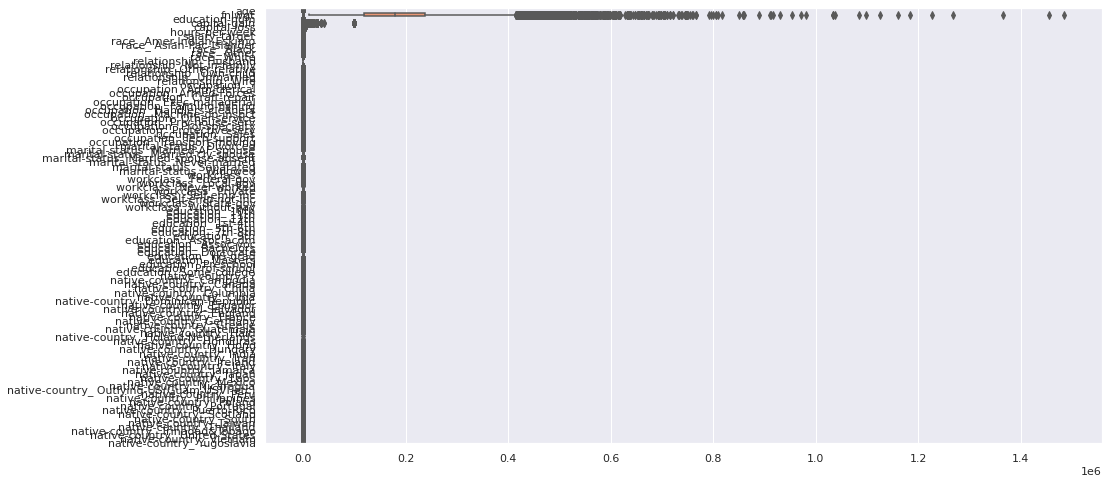

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(data=df2, orient="h", palette="Set2")

In [ ]:
df2.drop('fnlwgt', axis =1, inplace= True)

# Eliminar outliers


## Age

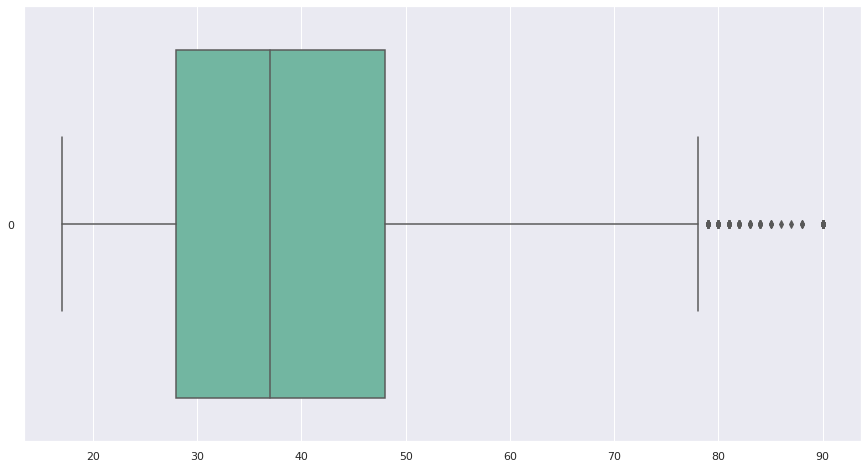

In [ ]:
sns.boxplot(data=df2['age'], orient="h", palette="Set2")

In [ ]:
IQR = df2['age'].quantile(0.75) - df2['age'].quantile(0.25)

lower = df2['age'].quantile(0.25) - (1.5*IQR)
upper = df2['age'].quantile(0.25) + (1.5*IQR)

df2.loc[df2['age']<=lower, 'age'] = lower


In [ ]:
df2.loc[df2['age']>= upper, 'age'] = upper

## Def clean_outliers

In [ ]:
def clean_outliers (df, var):

  iqr = df[var].quantile(0.75) - df[var].quantile (0.25)

  lower = df[var].quantile (0.25) - (1.5*iqr)
  upper = df[var].quantile (0.75) + (1.5*iqr)

  df.loc[df[var]<= lower, var] = lower
  df.loc[df[var]>=upper, var] = upper

## education-num

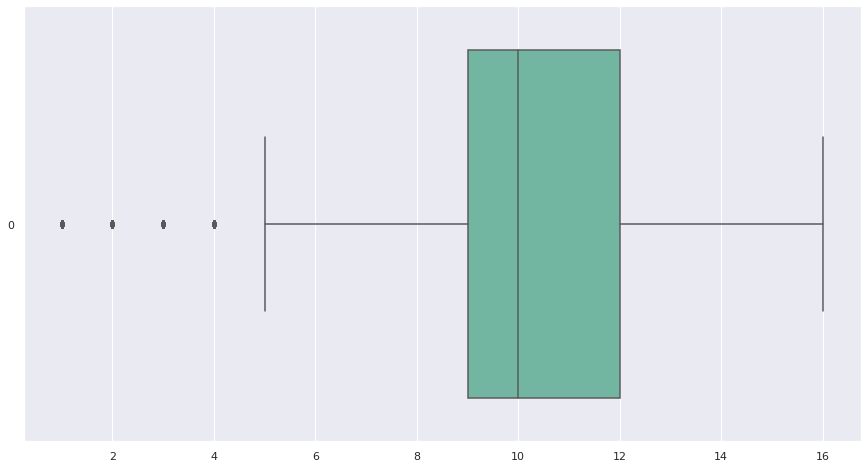

In [ ]:
sns.boxplot(data=df2['education-num'], orient="h", palette="Set2")

In [ ]:
clean_outliers(df2,'education-num')

## capital gain

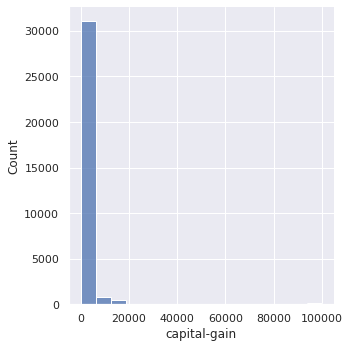

In [ ]:
sns.displot(df2['capital-gain'])

In [ ]:
df2['capital-gain-log']=df2['capital-gain'].apply(np.log).replace([np.inf,-np.inf],0)

In [ ]:
df2.drop('capital-gain',axis= 1, inplace= True)

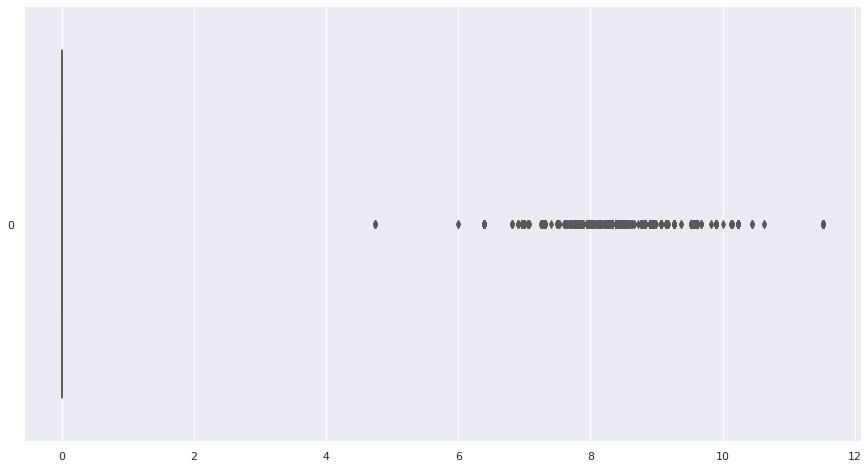

In [ ]:
sns.boxplot(data=df2['capital-gain-log'], orient="h", palette="Set2")

#capital loss


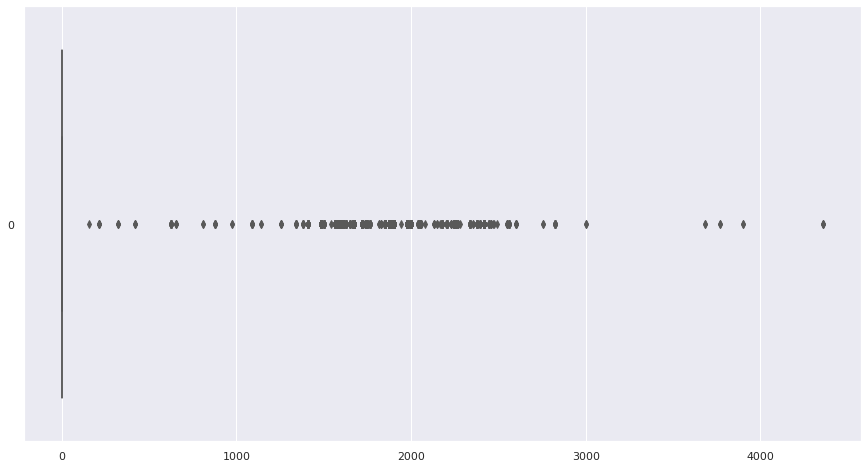

In [ ]:
sns.boxplot(data=df2['capital-loss'], orient="h", palette="Set2")

In [ ]:
df2['capital-loss-log']=df2['capital-loss'].apply(np.log).replace([np.inf,-np.inf],0)

In [ ]:
df2.drop('capital-loss',axis= 1, inplace =True)

In [ ]:
#clean_outliers(df2,'capital-loss-log')

#hours per week

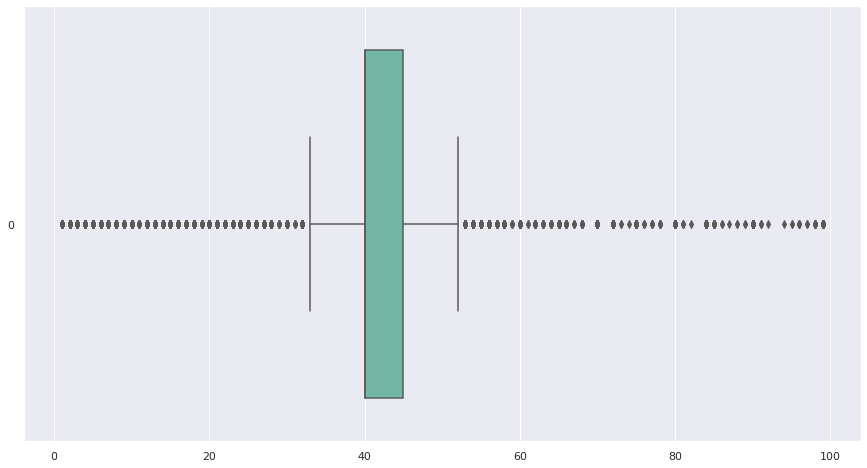

In [ ]:
sns.boxplot(data=df2['hours-per-week'], orient="h", palette="Set2")

In [ ]:
clean_outliers(df2, 'hours-per-week')

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,37.889653,12.240127,17.0,28.0,37.0,48.0,58.000000
education-num,32561.0,10.124321,2.459770,4.5,9.0,10.0,12.0,16.000000
hours-per-week,32561.0,41.202451,6.187005,32.5,40.0,40.0,45.0,52.500000
salary_target,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.000000
race_ Amer-Indian-Eskimo,32561.0,0.009551,0.097264,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...
native-country_ United-States,32561.0,0.895857,0.305451,0.0,1.0,1.0,1.0,1.000000
native-country_ Vietnam,32561.0,0.002058,0.045316,0.0,0.0,0.0,0.0,1.000000
native-country_ Yugoslavia,32561.0,0.000491,0.022162,0.0,0.0,0.0,0.0,1.000000
capital-gain-log,32561.0,0.734601,2.454680,0.0,0.0,0.0,0.0,11.512915


# Standar Scaler


In [ ]:
sc = StandardScaler()

In [ ]:
X = df2.drop('salary_target', axis = 1)

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,37.889653,12.240127,17.0,28.0,37.0,48.0,58.000000
education-num,32561.0,10.124321,2.459770,4.5,9.0,10.0,12.0,16.000000
hours-per-week,32561.0,41.202451,6.187005,32.5,40.0,40.0,45.0,52.500000
race_ Amer-Indian-Eskimo,32561.0,0.009551,0.097264,0.0,0.0,0.0,0.0,1.000000
race_ Asian-Pac-Islander,32561.0,0.031909,0.175761,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...
native-country_ United-States,32561.0,0.895857,0.305451,0.0,1.0,1.0,1.0,1.000000
native-country_ Vietnam,32561.0,0.002058,0.045316,0.0,0.0,0.0,0.0,1.000000
native-country_ Yugoslavia,32561.0,0.000491,0.022162,0.0,0.0,0.0,0.0,1.000000
capital-gain-log,32561.0,0.734601,2.454680,0.0,0.0,0.0,0.0,11.512915


In [ ]:
X = sc.fit_transform(X)

X

array([[ 0.09071505,  1.16910267, -0.194354  , ..., -0.02217266,
         2.83125725, -0.22107419],
       [ 0.98941232,  1.16910267, -1.40659071, ..., -0.02217266,
        -0.29926996, -0.22107419],
       [ 0.0090153 , -0.45709061, -0.194354  , ..., -0.02217266,
        -0.29926996, -0.22107419],
       ...,
       [ 1.64301033, -0.45709061, -0.194354  , ..., -0.02217266,
        -0.29926996, -0.22107419],
       [-1.29818072, -0.45709061, -1.40659071, ..., -0.02217266,
        -0.29926996, -0.22107419],
       [ 1.15281182, -0.45709061, -0.194354  , ..., -0.02217266,
         3.61877739, -0.22107419]])

In [ ]:
y = df2['salary_target']

In [ ]:
y.value_counts()

0    24720
1     7841
Name: salary_target, dtype: int64

#Trainning model


In [ ]:
X.shape

(32561, 105)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (26048, 105)
Test data shape: (6513, 105)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()

In [ ]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
result = {
    'Actual': y_test,
    'Forecast': y_pred
}

In [ ]:
pd.DataFrame(result)

,Actual,Forecast
14160,0,0
27048,0,0
28868,1,1
5667,0,0
7827,0,0
...,...,...
1338,0,0
24534,1,0
18080,1,1
10354,0,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.8532166436358053


#XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(max_depth= 4, 
    min_samples_leaf=100,
    random_state=42)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(max_depth=4, min_samples_leaf=100, random_state=42)

In [ ]:
y_pred_xgboost = model.predict(X_test)

In [ ]:
result2 = {
    'Actual': y_test,
    'Forecast': y_pred_xgboost
}

In [ ]:
pd.DataFrame(result2)

,Actual,Forecast
14160,0,0
27048,0,0
28868,1,1
5667,0,0
7827,0,0
...,...,...
1338,0,0
24534,1,0
18080,1,1
10354,0,0


In [ ]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_xgboost)))

Accuracy Score: 0.8717948717948718


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import metrics

In [ ]:
model_tree= DecisionTreeClassifier( 
    max_depth= 8, 
    min_samples_leaf=100,
    random_state=42)

In [ ]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100, random_state=42)

In [ ]:
y_pred_tree = model_tree.predict(X_test)

In [ ]:
result3 = {
    'Actual': y_test,
    'Forecast': y_pred_tree
}

In [ ]:
pd.DataFrame(result3)

,Actual,Forecast
14160,0,0
27048,0,0
28868,1,1
5667,0,0
7827,0,0
...,...,...
1338,0,0
24534,1,0
18080,1,1
10354,0,0


In [ ]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_tree)))

Accuracy Score: 0.8556732688469215


#Check overfitting


In [ ]:
train_scores, test_scores = list(), list()

In [ ]:
valores = [i for i in range(1, 17)]

In [ ]:
%%time
for i in valores:
  dt_overfit = DecisionTreeClassifier(max_depth=i, min_samples_leaf=100, random_state=42)
  dt_overfit.fit(X_train,y_train)
  acc_train_overfit =dt_overfit.score(X_train,y_train)
  train_scores.append(acc_train_overfit) 
  acc_test_overfit =dt_overfit.score(X_test,y_test)
  test_scores.append(acc_test_overfit)
  print(f'MaxDepth= {i}, Train acc:{np.round(acc_train_overfit,4)}, Test acc:{np.round(acc_test_overfit,4)}') 

MaxDepth= 1, Train acc:0.7593, Test acc:0.7588
MaxDepth= 2, Train acc:0.8283, Test acc:0.828
MaxDepth= 3, Train acc:0.8434, Test acc:0.8451
MaxDepth= 4, Train acc:0.8434, Test acc:0.8451
MaxDepth= 5, Train acc:0.848, Test acc:0.85
MaxDepth= 6, Train acc:0.8524, Test acc:0.8526
MaxDepth= 7, Train acc:0.8524, Test acc:0.8526
MaxDepth= 8, Train acc:0.8552, Test acc:0.8557
MaxDepth= 9, Train acc:0.856, Test acc:0.8567
MaxDepth= 10, Train acc:0.8571, Test acc:0.8564
MaxDepth= 11, Train acc:0.858, Test acc:0.8569
MaxDepth= 12, Train acc:0.858, Test acc:0.8569
MaxDepth= 13, Train acc:0.8584, Test acc:0.8569
MaxDepth= 14, Train acc:0.8591, Test acc:0.8575
MaxDepth= 15, Train acc:0.8591, Test acc:0.8572
MaxDepth= 16, Train acc:0.8591, Test acc:0.8572
CPU times: user 2.36 s, sys: 3.5 ms, total: 2.37 s
Wall time: 2.37 s


In [ ]:
from matplotlib import pyplot

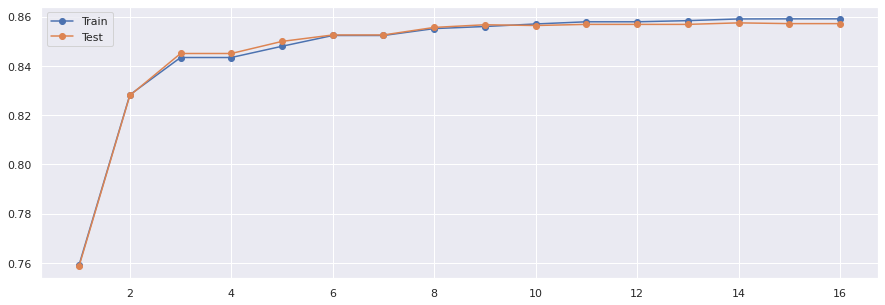

In [ ]:
plt.figure(figsize=(15,5))

pyplot.plot(valores, train_scores, '-o', label='Train')
pyplot.plot(valores, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

#Final summary

In [ ]:
result_final = {
    'Actual': y_test,
    'Logistic': y_pred,
    'XGBClass' : y_pred_xgboost,
    'Desicion_T': y_pred_tree
}

In [ ]:
pd.DataFrame(result_final)

,Actual,Logistic,XGBClass,Desicion_T
14160,0,0,0,0
27048,0,0,0,0
28868,1,1,1,1
5667,0,0,0,0
7827,0,0,0,0
...,...,...,...,...
1338,0,0,0,0
24534,1,0,0,0
18080,1,1,1,1
10354,0,0,0,0


In [ ]:
print("Accuracy Score Logistic: {0:.2g}".format(accuracy_score(y_test, y_pred)))
print("Accuracy Score XGBosst: {0:.2g}".format(accuracy_score(y_test, y_pred_xgboost)))
print("Accuracy Score Desicion Tree: {0:.2g}".format(accuracy_score(y_test, y_pred_tree)))

Accuracy Score Logistic: 0.85
Accuracy Score XGBosst: 0.87
Accuracy Score Desicion Tree: 0.86
